# Challenge - 1st scenery

This document aims to solve the first proposed scenery, which is data analysis in a given dataset. It will be aimed to verify anomalies, propose futher investigation and solutions to mitigate the founded issues.

## Dataset load and requirements installation

In [65]:
%pip install -r requirements.txt

  Obtaining dependency information for pandera from https://files.pythonhosted.org/packages/cc/63/c43878e71ad1b290a90d312842287e61359e9744f1744b15a392eec513f5/pandera-0.16.1-py3-none-any.whl.metadata
  Obtaining dependency information for pydantic<2.0.0 from https://files.pythonhosted.org/packages/5d/68/7a0c5f8b854d3fad9cd82a6312205025597481e46b4ec36f6dea4f1fb93b/pydantic-1.10.12-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.3/149.3 kB 2.4 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for typeguard>=3.0.2 from https://files.pythonhosted.org/packages/c4/9d/0918045e44d305ffe1e4c474e81049a2f036b7dec4d4d35483d2b72f353e/typeguard-4.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for typing-inspect>=0.6.0 from https://files.pythonhosted.org/packages/65/f3/107a22063bf27bdccf2024833d3445f4eea42b2e598abfbd46f6a63b6cb0/typing_inspect-0.9.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
df = pd.read_excel('./sample.xls')

df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [23]:
df.tail(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [17]:
df.shape

(9994, 21)

In [16]:
len(df)

9994

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

By the above dataframe info, it's possible to check that there is a few numeric variables, with the most part as categorical, with no missing values. Let's explore further to confirm this information.

In [25]:
for col in df.columns:
    print("{}: {}".format(col, len(df[col].unique())))

Row ID: 9994
Order ID: 5009
Order Date: 1237
Ship Date: 1334
Ship Mode: 4
Customer ID: 793
Customer Name: 793
Segment: 3
Country: 1
City: 531
State: 49
Postal Code: 631
Region: 4
Product ID: 1862
Category: 3
Sub-Category: 17
Product Name: 1850
Sales: 6144
Quantity: 14
Discount: 12
Profit: 7545


In [26]:
print(df['Ship Mode'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [27]:
print(df['Segment'].unique())

['Consumer' 'Corporate' 'Home Office']


In [28]:
print(df['Region'].unique())

['South' 'West' 'Central' 'East']


In [29]:
print(df['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


In [30]:
print(df['Sub-Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


Since there is no missing values, let's procceed with our investigation. Now, we will be focusing on numeric variables.

In [18]:
df[['Sales', 'Quantity', 'Discount', 'Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


It is possible also to view data through some plots, to verify possible outliers.

<Axes: xlabel='Sales'>

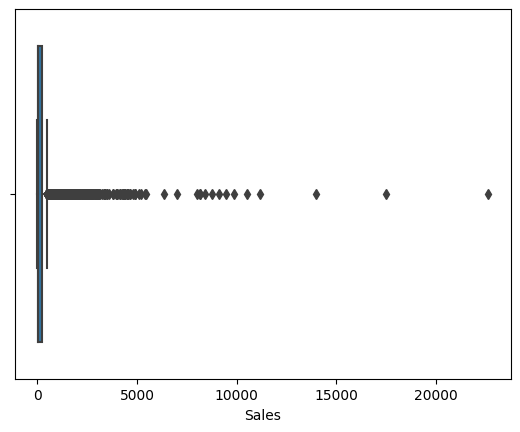

In [33]:
sns.boxplot(x=df['Sales'])

<Axes: xlabel='Sales', ylabel='Count'>

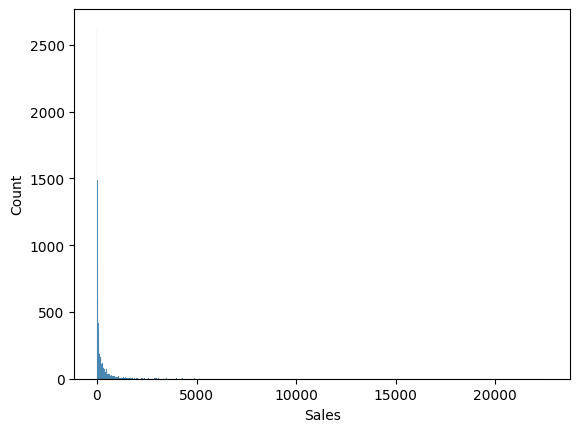

In [36]:
sns.histplot(x=df['Sales'])

Using Sales column, it is possible to verify an interesting behaviour. Let's check some of these records.

In [38]:
sales_df = df[df['Sales'] > 5000]

sales_df.count()

Row ID           19
Order ID         19
Order Date       19
Ship Date        19
Ship Mode        19
Customer ID      19
Customer Name    19
Segment          19
Country          19
City             19
State            19
Postal Code      19
Region           19
Product ID       19
Category         19
Sub-Category     19
Product Name     19
Sales            19
Quantity         19
Discount         19
Profit           19
dtype: int64

In [45]:
sales_df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,19.000000,19,19,19.000000,19.000000,19.000000,19.000000,19.000000
mean,5089.842105,2016-05-13 00:00:00,2016-05-17 00:00:00,39971.736842,9487.429263,5.473684,0.115789,2475.331563
min,166.000000,2014-03-18 00:00:00,2014-03-23 00:00:00,2908.000000,5083.960000,3.000000,0.000000,-3839.990400
25%,2661.000000,2015-01-29 00:00:00,2015-02-04 12:00:00,14577.500000,6677.455000,4.000000,0.000000,1235.993200
50%,6341.000000,2016-10-02 00:00:00,2016-10-08 00:00:00,30318.000000,8399.976000,5.000000,0.000000,2504.221600
75%,7247.000000,2017-06-29 00:00:00,2017-07-02 00:00:00,52304.000000,10196.355000,5.500000,0.200000,4275.232150
max,9040.000000,2017-11-17 00:00:00,2017-11-22 00:00:00,98115.000000,22638.480000,13.000000,0.500000,8399.976000
std,2922.439967,NaN,NaN,31505.621066,4447.273206,2.365690,0.189336,2927.035705


In [46]:
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
165,166,CA-2014-139892,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,78207,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920
509,510,CA-2015-145352,2015-03-16,2015-03-22,Standard Class,CM-12385,Christopher Martinez,Consumer,United States,Atlanta,...,30318,South,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750
683,684,US-2017-168116,2017-11-04,2017-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
2505,2506,CA-2014-143917,2014-07-25,2014-07-27,Second Class,KL-16645,Ken Lonsdale,Consumer,United States,San Francisco,...,94122,West,OFF-SU-10000151,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,8187.650,5,0.0,327.5060
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888


Proceeding with the investigation, one can view other plots to verify if the sales outliers is the same as other variables.

<Axes: xlabel='Quantity'>

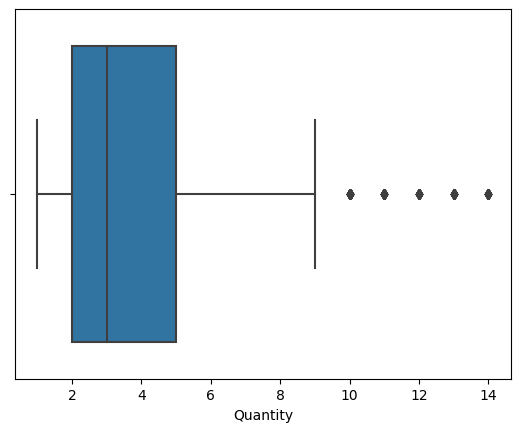

In [47]:
sns.boxplot(x=df['Quantity'])

<Axes: xlabel='Quantity', ylabel='Count'>

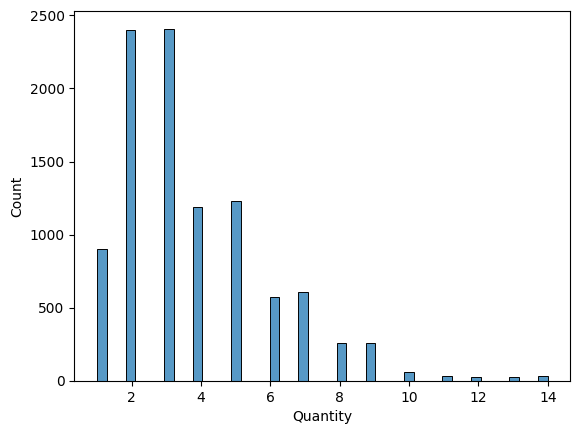

In [48]:
sns.histplot(x=df['Quantity'])

In [49]:
quant_df = df[df['Quantity'] > 8]

quant_df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,428.000000,428,428,428.000000,428.000000,428.000000,428.000000,428.000000
mean,5057.614486,2016-04-16 08:17:56.635514112,2016-04-20 07:51:01.682243072,55155.474299,534.283390,10.044393,0.148575,80.101368
min,11.000000,2014-01-06 00:00:00,2014-01-10 00:00:00,1841.000000,3.240000,9.000000,0.000000,-1862.312400
25%,2627.000000,2015-05-12 18:00:00,2015-05-18 06:00:00,21918.500000,54.152000,9.000000,0.000000,9.509625
50%,5057.500000,2016-05-30 00:00:00,2016-06-03 00:00:00,56573.500000,154.587000,9.000000,0.050000,29.339100
75%,7594.000000,2017-05-20 00:00:00,2017-05-23 18:00:00,90032.000000,601.089000,11.000000,0.200000,105.281100
max,9985.000000,2017-12-25 00:00:00,2018-01-01 00:00:00,99207.000000,9892.740000,14.000000,0.800000,4946.370000
std,2872.736374,NaN,NaN,32868.218947,906.985841,1.597830,0.205170,328.105548


In [52]:
quant_df['Order ID'].isin(sales_df['Order ID']).value_counts()

Order ID
False    425
True       3
Name: count, dtype: int64

<Axes: xlabel='Discount'>

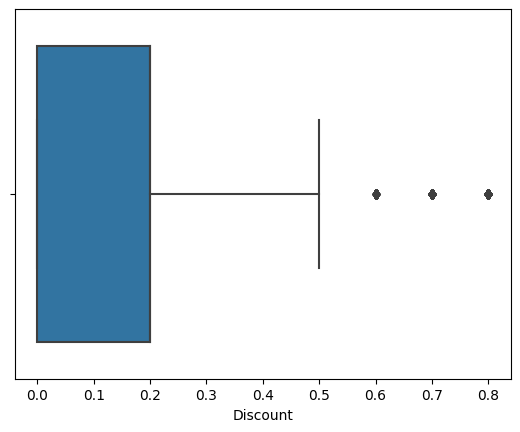

In [54]:
sns.boxplot(x=df['Discount'])

In [55]:
discount_df = df[df['Discount'] > 0.5]

discount_df['Order ID'].isin(sales_df['Order ID']).value_counts()

Order ID
False    854
True       2
Name: count, dtype: int64

In [56]:
discount_df['Order ID'].isin(quant_df['Order ID']).value_counts()

Order ID
False    756
True     100
Name: count, dtype: int64

<Axes: xlabel='Profit'>

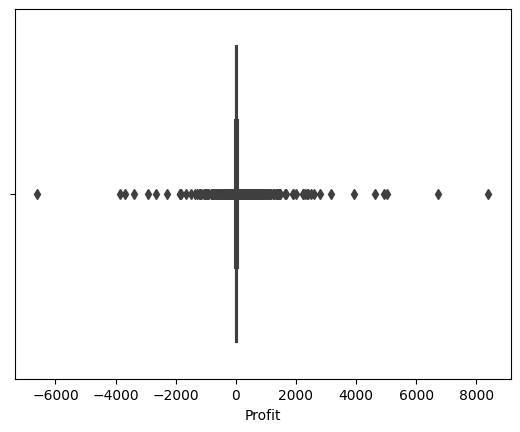

In [57]:
sns.boxplot(x=df['Profit'])

In [63]:
profit_df = df[(df['Profit'] < -1000) | (df['Profit'] > 2000)]

profit_df['Order ID'].isin(quant_df['Order ID']).value_counts()

Order ID
False    30
True      7
Name: count, dtype: int64

In [64]:
profit_df['Order ID'].isin(discount_df['Order ID']).value_counts()

Order ID
True     19
False    18
Name: count, dtype: int64

## Conclusion

As proved above, there is little to none correlation between numerical variables outliers. Hence, it is possible to propose some quality tests to assure that new data will be reliable and stable.

The possible tests could be:
* Verify if incoming data have some missing values;
* For `Orders` table:
    * Verify if `Order Date` is less or equal than `Ship Date`;
    * If `Order ID` value already exists, check the orther info columns;
    * Verify if the values of `Sales`, `Discount`, `Profit` and `Quantity` for outliers based on the inter-quartile range, for instance;
* For `Orders` and `People` tables:
    * Verify if `Customer Name` in `Orders` table exists in `People` table;

With this steps, it will be possible to prevent a wide variety of anomalies that could happen in the dataset. This can be done using some tools and frameworks in data ingestion, such as DBT or pipeline orchestrators, like Airflow or Flyte. In this document, lets check for anomalies using Panderas, an opensource library.

## Testing with Panderas

In [103]:
import pandera as pa
from pandera.error_handlers import SchemaErrors


schema = pa.DataFrameSchema({
    "Sales": pa.Column("float64", pa.Check(check_fn=None).le(5000.000)),
    "Quantity": pa.Column("int64", checks=pa.Check(check_fn=None).le(8)),
    "Discount": pa.Column("float64", checks=pa.Check(check_fn=None).le(0.5)),
    "Discount": pa.Column("float64", checks=pa.Check(check_fn=None).between(min_value=-1000.0, max_value=2000.0))
})


try:
    output_df = schema.validate(df, lazy=True)
except SchemaErrors as err:
    output_df = err.failure_cases

output_df

,schema_context,column,check,check_number,failure_case,index
0,Column,Sales,less_than_or_equal_to(5000.0),0,8159.952,165
294,Column,Quantity,less_than_or_equal_to(8),0,14.000,6499
305,Column,Quantity,less_than_or_equal_to(8),0,9.000,6823
304,Column,Quantity,less_than_or_equal_to(8),0,9.000,6777
303,Column,Quantity,less_than_or_equal_to(8),0,9.000,6737
...,...,...,...,...,...,...
145,Column,Quantity,less_than_or_equal_to(8),0,11.000,3212
144,Column,Quantity,less_than_or_equal_to(8),0,9.000,3209
143,Column,Quantity,less_than_or_equal_to(8),0,9.000,3183
142,Column,Quantity,less_than_or_equal_to(8),0,13.000,3169


As we can see, Pandera raise an error if some of the conditions are not met. In this case, there is 447 rows not meeting the conditions setted. Note that this is just an example, as one can perform as many validations as possible.